#  Predicting Bank Loan Eligibility from Loan Status Prediction Dataset

## Introduction

When an individual requests a loan from an entity such as a government, corporation or bank, they must submit an application in which they request the amount they need to borrow. The entity can approve or deny the request, based on factors such as the individual’s financial history and character. 

In our project, we are trying to predict whether or not a person will have their loan approved based on the characteristics described in the data set. This leads us to the question:
> Will a loan applicant have their loan approved or denied based on the applicant's income, co-applicant's income, loan amount (in thousands), and loan amount term (in months)?

This dataset compllied [here](https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data) by Bhavik Jikadara contains loan status whether the bank gives the loan to a applicant and 12 chararcteristics of applicants, including categorical variables:

- Loan_ID: A unique loan ID.
- Gender: Either male or female.
- Married: Weather Married(yes) or Not Marttied(No).
- Dependents: Number of persons depending on the client.
- Education: Applicant Education(Graduate or Undergraduate).
- Self_Employed: Self-employed (Yes/No).
- Credit_History: Credit history meets guidelines.
- Property_Area: Applicants are living either Urban, Semi-Urban or Rural.

as well as quantitative variables:


- ApplicantIncome: Applicant income.
- CoapplicantIncome: Co-applicant income.
- LoanAmount: Loan amount in thousands.
- Loan_Amount_Term: Terms of the loan in months.

## Preliminary exploratory data analysis

The dataset is a .csv file with headers.  We’ll load it using `read_csv` function with no additional argument.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# reading the data

loan_data <- read_csv("Group Project/loan_data.csv")
glimpse (loan_data)

Rows: 381 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Pro...
dbl (5): ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 381
Columns: 13
$ Loan_ID           <chr> "LP001003", "LP001005", "LP001006", "LP001008", "LP0…
$ Gender            <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Mal…
$ Married           <chr> "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No"…
$ Dependents        <chr> "1", "0", "0", "0", "0", "2", "2", "0", "2", "0", "1…
$ Education         <chr> "Graduate", "Graduate", "Not Graduate", "Graduate", …
$ Self_Employed     <chr> "No", "Yes", "No", "No", "No", "No", NA, "No", "No",…
$ ApplicantIncome   <dbl> 4583, 3000, 2583, 6000, 2333, 3200, 2500, 1853, 1299…
$ CoapplicantIncome <dbl> 1508, 0, 2358, 0, 1516, 700, 1840, 2840, 1086, 0, 0,…
$ LoanAmount        <dbl> 128, 66, 120, 141, 95, 70, 109, 114, 17, 125, 100, 7…
$ Loan_Amount_Term  <dbl> 360, 360, 360, 360, 360, 360, 360, 360, 120, 360, 24…
$ Credit_History    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, NA, 0, 1, 1, 0, 0, 0, …
$ Property_Area     <chr> "Rural", "Urban", "Urban", "Urban", "Urban", "Urban"…
$ Loan_Status     

The dataset is organized in a tidy format, enabling us to proceed with the next data analysis

In [19]:
# splitting between training and testing sets 

loan_split <- initial_split(loan_data, prop = 0.75, strata = Loan_Status) 
loan_training <- training(loan_split) 
loan_testing <- testing(loan_split) 

# exploratory data analysis (table) 

num_obs <- nrow (loan_data)
loan_counts <- loan_training |>
    group_by(Loan_Status) |>
    summarise(count  = n(),
              percentage = n()/num_obs *100) 

loan_counts
# means of the predictor variables we plan to use

loan_means <- loan_training |> 
    select(ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term) |>
    map_dfr(mean, na.rm = TRUE) 

loan_means

# count rows with missing data
loan_missing_data <- colSums (is.na(loan_training))

loan_missing_data



Loan_Status,count,percentage
<chr>,<int>,<dbl>
N,82,21.52231
Y,203,53.28084


ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
<dbl>,<dbl>,<dbl>,<dbl>
3644.958,1356.291,105.6,337.6029


Loan_ID            Gender           Married        Dependents 
                0                 5                 0                 6 
        Education     Self_Employed   ApplicantIncome CoapplicantIncome 
                0                18                 0                 0 
       LoanAmount  Loan_Amount_Term    Credit_History     Property_Area 
                0                 8                25                 0 
      Loan_Status 
                0

Given that there are rows with missing entries for Loan_Amount_Term out of a total of 285 rows in the training data, we'll opt for mean imputation to fill these missing values instead of discarding a significant amount of data during our processing steps.

Warning message:
“Removed 8 rows containing non-finite values (`stat_bin()`).”


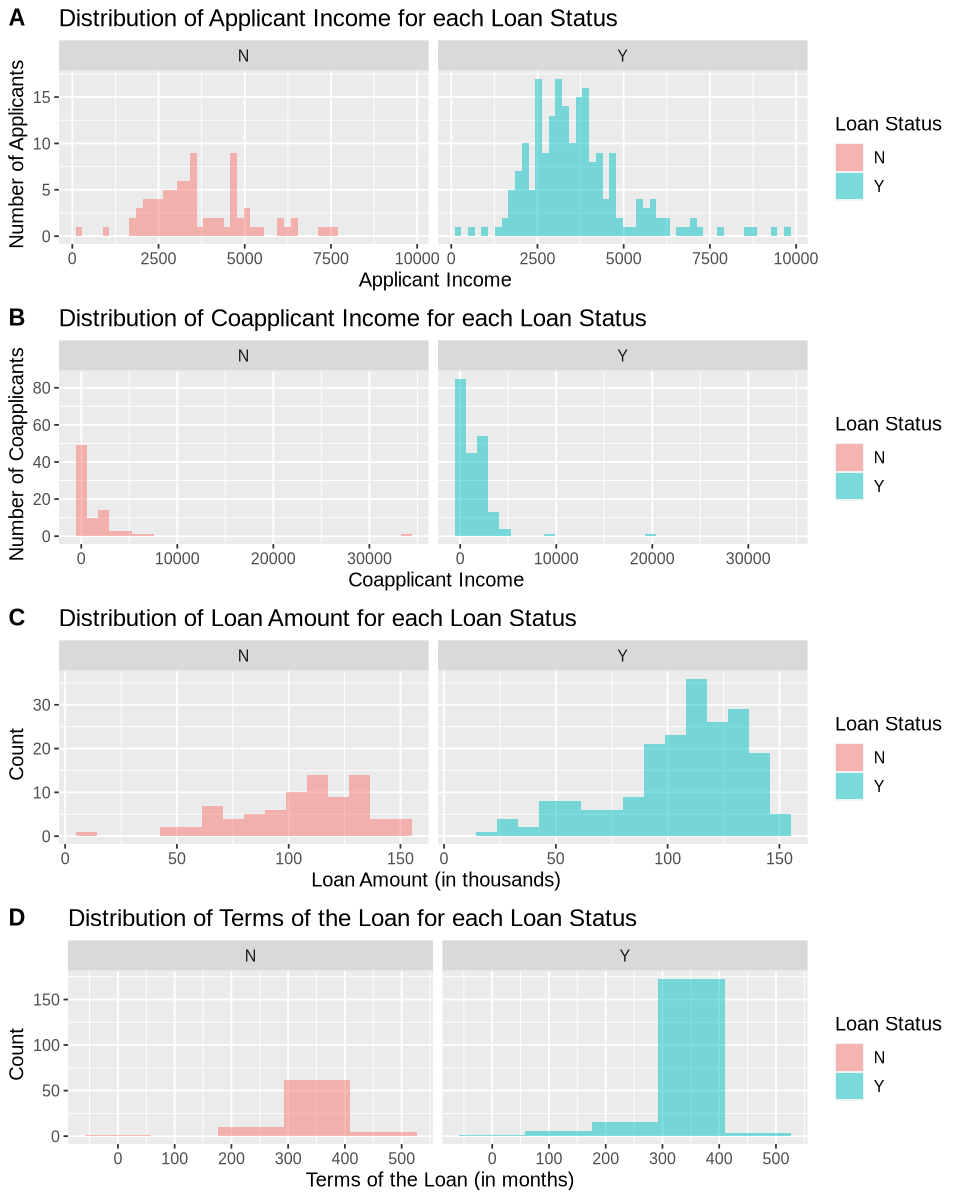

In [41]:
# exploratory data analysis (plots) 
options(repr.plot.width = 8, repr.plot.height = 10)
# distributions of each of the predictor variables

applicant_income_distribution <- loan_training |>
    ggplot(aes(x = ApplicantIncome, fill = Loan_Status)) +
    geom_histogram(alpha = 0.5, position = "identity", bins= 50)+
    facet_grid (cols = vars (Loan_Status))+
    labs ( x = " Applicant Income",
           y = " Number of Applicants",
          title = "Distribution of Applicant Income for each Loan Status",
          fill = "Loan Status")+
    theme(text = element_text (size = 12))

coapplicant_income_distribution <- loan_training |>
    ggplot(aes(x = CoapplicantIncome, fill = Loan_Status)) +
    geom_histogram(alpha = 0.5, position = "identity", bins=30)+
    facet_grid (cols = vars (Loan_Status))+
    labs ( x = " Coapplicant Income",
           y = " Number of Coapplicants",
          title = "Distribution of Coapplicant Income for each Loan Status",
          fill = "Loan Status")+
    theme(text = element_text (size = 12))

loan_amount_distribution <- loan_training |>
    ggplot(aes(x = LoanAmount, fill = Loan_Status)) +
    geom_histogram(alpha = 0.5, position = "identity", bins = 16)+
    facet_grid (cols = vars (Loan_Status))+
    labs ( x = " Loan Amount (in thousands)",
           y = " Count",
          title = "Distribution of Loan Amount for each Loan Status",
          fill = "Loan Status")+
    theme(text = element_text (size = 12))

loan_amount_term_distribution <- loan_training |>
    ggplot(aes(x = Loan_Amount_Term, fill = Loan_Status)) +
    geom_histogram(alpha = 0.5, position = "identity", bins= 5)+
    facet_grid (cols = vars (Loan_Status))+
    labs ( x = " Terms of the Loan (in months)",
           y = " Count",
          title = "Distribution of Terms of the Loan for each Loan Status",
          fill = "Loan Status")+
    theme(text = element_text (size = 12))

loan_distributions <- plot_grid (applicant_income_distribution,coapplicant_income_distribution,
                                 loan_amount_distribution,loan_amount_term_distribution, 
                                 ncol=1,
                                 labels = c("A", "B","C", "D"))
loan_distributions


## Methods 

K-nearest neighbours algorithm will be used to determine the potimal value of K for our classification model. 

We will select the columns containing variables that characterize the loan and the applicant's income as follows:

- ApplicantIncome
- CoapplicantIncome
- LoanAmount (in thousands)
- Loan_Amount_Term (in months)






## Expected outcomes and significance

#### What do you expect to find?

Using predictors to decide if a new applicant would be eligible for a loan.

#### What impact could such findings have?

The findings could show bias in loan approval and indicate which populations may have a harder time being approved for a loan. 

#### What future questions could this lead to?

This could lead to mechanistic questions about the underlying mechanism behind whether or not someone receives a loan. One could also pose an inferential question based on the preliminary exploratory data about how the variables in this data set can be applied to the wider population. 